## (1) 서울시 구별 CCTV와 인구 현황

서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인

In [169]:
import pandas as pd
import numpy as np

utf-8로 인코딩된 서울의 CCTV 데이터 CSV 파일을 읽어온다.

In [170]:
CCTV_Seoul = pd.read_csv('data/CCTV_Seoul.csv', encoding='utf-8')
CCTV_Seoul.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,"5,221","1,944",195.0,316.0,430,546.0,765.0,577.0,448.0
1,강 동 구,"1,879",303,387.0,134.0,59,144.0,194.0,273.0,385.0
2,강 북 구,"1,265",243,88.0,141.0,74,145.0,254.0,1.0,319.0
3,강 서 구,"1,617",219,155.0,118.0,230,187.0,190.0,264.0,254.0
4,관 악 구,"3,985",430,56.0,419.0,487,609.0,619.0,694.0,671.0


기관명에 스페이스가 없게 수정한다. 숫자에 천단위 표시 ,(콤마)가 있을 경우 모두 삭제.
기관명을 구별로 바꾸기 위해 rename을 사용하고 inplace=True 이다.

In [171]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '자치구'}, inplace=True)
CCTV_Seoul.head()

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,"5,221","1,944",195.0,316.0,430,546.0,765.0,577.0,448.0
1,강 동 구,"1,879",303,387.0,134.0,59,144.0,194.0,273.0,385.0
2,강 북 구,"1,265",243,88.0,141.0,74,145.0,254.0,1.0,319.0
3,강 서 구,"1,617",219,155.0,118.0,230,187.0,190.0,264.0,254.0
4,관 악 구,"3,985",430,56.0,419.0,487,609.0,619.0,694.0,671.0


서울 인구 통계 엑셀 파일을 읽어온다.

In [172]:
pop_Seoul = pd.read_excel('data/population_Seoul.xlsx', encoding='utf-8')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020.2/4,합계,4384076,9985652,4859501,5126151,9720846,4732275,4988571,264806,127226,137580,2.22,1534957
3,2020.2/4,종로구,74497,160520,77745,82775,150383,73288,77095,10137,4457,5680,2.02,28203
4,2020.2/4,중구,63354,136030,66545,69485,126092,61697,64395,9938,4848,5090,1.99,24035


rename 명령어를 이용해서 컬럼 이름을 변경한다.

In [173]:
pop_Seoul.rename(columns={pop_Seoul.columns[6] : '한국인',
                         pop_Seoul.columns[9] : '외국인',
                         pop_Seoul.columns[13] : '고령자'}, inplace=True)

## (2) CCTV와 인구 현황 데이터를 분석

서울시 전체 자치구별 CCTV 현황

In [174]:
CCTV_Seoul.head(26)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,"5,221","1,944",195.0,316.0,430,546.0,765.0,577.0,448.0
1,강 동 구,"1,879",303,387.0,134.0,59,144.0,194.0,273.0,385.0
2,강 북 구,"1,265",243,88.0,141.0,74,145.0,254.0,1.0,319.0
3,강 서 구,"1,617",219,155.0,118.0,230,187.0,190.0,264.0,254.0
4,관 악 구,"3,985",430,56.0,419.0,487,609.0,619.0,694.0,671.0
5,광 진 구,"1,581",470,42.0,83.0,87,64.0,21.0,468.0,346.0
6,구 로 구,"3,227",852,219.0,349.0,187,268.0,326.0,540.0,486.0
7,금 천 구,"1,634",27,17.0,242.0,101,382.0,136.0,199.0,530.0
8,노 원 구,"1,906",481,117.0,203.0,80,461.0,298.0,110.0,156.0
9,도 봉 구,858,197,66.0,8.0,185,59.0,155.0,117.0,71.0


In [175]:
CCTV_Seoul['소계'].tolist()

[' 5,221 ',
 ' 1,879 ',
 ' 1,265 ',
 ' 1,617 ',
 ' 3,985 ',
 ' 1,581 ',
 ' 3,227 ',
 ' 1,634 ',
 ' 1,906 ',
 ' 858 ',
 ' 2,003 ',
 ' 1,780 ',
 ' 1,935 ',
 ' 2,121 ',
 ' 2,835 ',
 ' 2,679 ',
 ' 3,003 ',
 ' 1,586 ',
 ' 2,775 ',
 ' 2,495 ',
 ' 2,063 ',
 ' 2,962 ',
 ' 1,471 ',
 ' 1,544 ',
 ' 1,068 ',
 nan,
 nan,
 nan]

In [176]:
# 데이터프레임 전처리 -> 공백과 쉼표 제거하기 (데이터 합치기 위해)
cctv_total_list = []
for i in range(len(CCTV_Seoul['소계'].tolist())-3):
    a = CCTV_Seoul['소계'].tolist()[i].replace(' ','')
    a = a.replace(',','')
    cctv_total_list.append(a)

In [177]:
# 데이터 전처리 과정(공백과 쉼표제거 -> 자료형 변환하기 위한 과정)
cctv_total_list
total_df = pd.DataFrame(cctv_total_list)
CCTV_Seoul[['소계']] = total_df[[0]]
CCTV_Seoul

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,"1,944",195.0,316.0,430,546.0,765.0,577.0,448.0
1,강 동 구,1879,303,387.0,134.0,59,144.0,194.0,273.0,385.0
2,강 북 구,1265,243,88.0,141.0,74,145.0,254.0,1.0,319.0
3,강 서 구,1617,219,155.0,118.0,230,187.0,190.0,264.0,254.0
4,관 악 구,3985,430,56.0,419.0,487,609.0,619.0,694.0,671.0
5,광 진 구,1581,470,42.0,83.0,87,64.0,21.0,468.0,346.0
6,구 로 구,3227,852,219.0,349.0,187,268.0,326.0,540.0,486.0
7,금 천 구,1634,27,17.0,242.0,101,382.0,136.0,199.0,530.0
8,노 원 구,1906,481,117.0,203.0,80,461.0,298.0,110.0,156.0
9,도 봉 구,858,197,66.0,8.0,185,59.0,155.0,117.0,71.0


In [178]:
# 소계의 자료형를 숫자형으로 변환(데이터 전처리 과정)
CCTV_Seoul[['소계']] = CCTV_Seoul[['소계']].apply(pd.to_numeric)

자치구별 CCTV 데이터에서 소계로 하위 5개 정렬

In [179]:
CCTV_Seoul.sort_values(by='소계', ascending=True)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
9,도 봉 구,858.0,197,66.0,8.0,185,59.0,155.0,117.0,71.0
24,중 랑 구,1068.0,NaN,NaN,NaN,770,102.0,121.0,66.0,9.0
2,강 북 구,1265.0,243,88.0,141.0,74,145.0,254.0,1.0,319.0
22,종 로 구,1471.0,8,7.0,599.0,132,195.0,148.0,281.0,101.0
23,중 구,1544.0,25,165.0,114.0,80,245.0,270.0,317.0,328.0
5,광 진 구,1581.0,470,42.0,83.0,87,64.0,21.0,468.0,346.0
17,송 파 구,1586.0,600,99.0,88.0,21,166.0,100.0,116.0,396.0
3,강 서 구,1617.0,219,155.0,118.0,230,187.0,190.0,264.0,254.0
7,금 천 구,1634.0,27,17.0,242.0,101,382.0,136.0,199.0,530.0
11,동 작 구,1780.0,238,93.0,29.0,503,130.0,254.0,278.0,255.0


In [180]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221.0,"1,944",195.0,316.0,430,546.0,765.0,577.0,448.0
4,관 악 구,3985.0,430,56.0,419.0,487,609.0,619.0,694.0,671.0
6,구 로 구,3227.0,852,219.0,349.0,187,268.0,326.0,540.0,486.0
16,성 북 구,3003.0,779,84.0,304.0,241,279.0,388.0,285.0,643.0
21,은 평 구,2962.0,"1,365",83.0,99.0,343,180.0,296.0,229.0,367.0


최근 3년간 CCTV 증가율

In [181]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2018년'] + CCTV_Seoul['2017년'] + CCTV_Seoul['2016년']) / CCTV_Seoul['2015년'] * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
5,광 진 구,1581.0,470,42.0,83.0,87,64.0,21.0,468.0,346.0,1304.687500
13,서대문구,2121.0,565,233.0,214.0,114,109.0,277.0,415.0,194.0,812.844037
18,양 천 구,2775.0,772,161.0,185.0,169,172.0,349.0,137.0,830.0,765.116279
11,동 작 구,1780.0,238,93.0,29.0,503,130.0,254.0,278.0,255.0,605.384615
1,강 동 구,1879.0,303,387.0,134.0,59,144.0,194.0,273.0,385.0,591.666667


서울시 전체 구별 인구 현황

In [182]:
pop_Seoul.head(28)

,기간,자치구,세대,인구,인구.1,인구.2,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2020.2/4,합계,4384076,9985652,4859501,5126151,9720846,4732275,4988571,264806,127226,137580,2.22,1534957
3,2020.2/4,종로구,74497,160520,77745,82775,150383,73288,77095,10137,4457,5680,2.02,28203
4,2020.2/4,중구,63354,136030,66545,69485,126092,61697,64395,9938,4848,5090,1.99,24035
5,2020.2/4,용산구,111586,245362,119494,125868,229431,110527,118904,15931,8967,6964,2.06,39650
6,2020.2/4,성동구,135937,304851,148554,156297,297397,145258,152139,7454,3296,4158,2.19,45005
7,2020.2/4,광진구,166307,363925,175083,188842,349574,168879,180695,14351,6204,8147,2.1,49457
8,2020.2/4,동대문구,166451,360380,177237,183143,345593,171392,174201,14787,5845,8942,2.08,60817
9,2020.2/4,중랑구,183310,399415,197384,202031,394414,195349,199065,5001,2035,2966,2.15,67637


In [183]:
# pop_Seoul['자치구']
# CCTV_Seoul['자치구']

비율 계산을 위해 0, 1, 2번 행이 필요 없으므로 삭제한다. 행을 지우는 drop 명령어를 사용한다.

In [184]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.drop([1], inplace=True)
pop_Seoul.drop([2], inplace=True)
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자
3,2020.2/4,종로구,74497,160520,77745,82775,150383,73288,77095,10137,4457,5680,2.02,28203
4,2020.2/4,중구,63354,136030,66545,69485,126092,61697,64395,9938,4848,5090,1.99,24035
5,2020.2/4,용산구,111586,245362,119494,125868,229431,110527,118904,15931,8967,6964,2.06,39650
6,2020.2/4,성동구,135937,304851,148554,156297,297397,145258,152139,7454,3296,4158,2.19,45005
7,2020.2/4,광진구,166307,363925,175083,188842,349574,168879,180695,14351,6204,8147,2.1,49457


각 자치구별 '외국인비율'과 '고령자비율'을 계산한다

In [185]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구'] * 100
pop_Seoul.head(25)

,기간,자치구,세대,인구,인구.1,인구.2,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자,외국인비율,고령자비율
3,2020.2/4,종로구,74497,160520,77745,82775,150383,73288,77095,10137,4457,5680,2.02,28203,6.3151,17.5698
4,2020.2/4,중구,63354,136030,66545,69485,126092,61697,64395,9938,4848,5090,1.99,24035,7.30574,17.6689
5,2020.2/4,용산구,111586,245362,119494,125868,229431,110527,118904,15931,8967,6964,2.06,39650,6.49286,16.1598
6,2020.2/4,성동구,135937,304851,148554,156297,297397,145258,152139,7454,3296,4158,2.19,45005,2.44513,14.7629
7,2020.2/4,광진구,166307,363925,175083,188842,349574,168879,180695,14351,6204,8147,2.1,49457,3.94339,13.5899
8,2020.2/4,동대문구,166451,360380,177237,183143,345593,171392,174201,14787,5845,8942,2.08,60817,4.10317,16.8758
9,2020.2/4,중랑구,183310,399415,197384,202031,394414,195349,199065,5001,2035,2966,2.15,67637,1.25208,16.934
10,2020.2/4,성북구,195064,452290,217551,234739,441812,213431,228381,10478,4120,6358,2.26,72822,2.31666,16.1007
11,2020.2/4,강북구,145559,315395,153389,162006,311773,152028,159745,3622,1361,2261,2.14,62338,1.1484,19.7651
12,2020.2/4,도봉구,138966,331744,161724,170020,329560,160855,168705,2184,869,1315,2.37,60784,0.658339,18.3226


In [186]:
pop_Seoul.sort_values(by='인구', ascending=False).head(5)

,기간,자치구,세대,인구,인구.1,인구.2,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자,외국인비율,고령자비율
26,2020.2/4,송파구,280135,678067,327383,350684,671512,324317,347195,6555,3066,3489,2.4,90700,0.966719,13.3763
18,2020.2/4,강서구,265252,593203,286668,306535,586936,283697,303239,6267,2971,3296,2.21,87032,1.05647,14.6715
25,2020.2/4,강남구,233484,546158,261187,284971,541233,258753,282480,4925,2434,2491,2.32,73097,0.901754,13.3839
13,2020.2/4,노원구,217897,533041,257473,275568,528887,255624,273263,4154,1849,2305,2.43,83636,0.779302,15.6904
23,2020.2/4,관악구,273715,516318,258740,257578,499740,250829,248911,16578,7911,8667,1.83,77341,3.21081,14.9793


In [187]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,기간,자치구,세대,인구,인구.1,인구.2,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자,외국인비율,고령자비율
21,2020.2/4,영등포구,179787,405154,202648,202506,373349,184905,188444,31805,17743,14062,2.08,60071,7.8501,14.8267
19,2020.2/4,구로구,178367,436707,218051,218656,405075,200098,204977,31632,17953,13679,2.27,68280,7.2433,15.6352
20,2020.2/4,금천구,112570,250554,128078,122476,232250,117762,114488,18304,10316,7988,2.06,38950,7.30541,15.5456
23,2020.2/4,관악구,273715,516318,258740,257578,499740,250829,248911,16578,7911,8667,1.83,77341,3.21081,14.9793
5,2020.2/4,용산구,111586,245362,119494,125868,229431,110527,118904,15931,8967,6964,2.06,39650,6.49286,16.1598


In [188]:
# 외국인 비율을 기준으로 내림차순
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,기간,자치구,세대,인구,인구.1,인구.2,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자,외국인비율,고령자비율
21,2020.2/4,영등포구,179787,405154,202648,202506,373349,184905,188444,31805,17743,14062,2.08,60071,7.8501,14.8267
4,2020.2/4,중구,63354,136030,66545,69485,126092,61697,64395,9938,4848,5090,1.99,24035,7.30574,17.6689
20,2020.2/4,금천구,112570,250554,128078,122476,232250,117762,114488,18304,10316,7988,2.06,38950,7.30541,15.5456
19,2020.2/4,구로구,178367,436707,218051,218656,405075,200098,204977,31632,17953,13679,2.27,68280,7.2433,15.6352
5,2020.2/4,용산구,111586,245362,119494,125868,229431,110527,118904,15931,8967,6964,2.06,39650,6.49286,16.1598


In [189]:
# 고령자 인구를 기준으로 내림차순 정렬
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,기간,자치구,세대,인구,인구.1,인구.2,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자,외국인비율,고령자비율
26,2020.2/4,송파구,280135,678067,327383,350684,671512,324317,347195,6555,3066,3489,2.4,90700,0.966719,13.3763
18,2020.2/4,강서구,265252,593203,286668,306535,586936,283697,303239,6267,2971,3296,2.21,87032,1.05647,14.6715
13,2020.2/4,노원구,217897,533041,257473,275568,528887,255624,273263,4154,1849,2305,2.43,83636,0.779302,15.6904
14,2020.2/4,은평구,210664,483938,232423,251515,479524,230640,248884,4414,1783,2631,2.28,83272,0.9121,17.2072
23,2020.2/4,관악구,273715,516318,258740,257578,499740,250829,248911,16578,7911,8667,1.83,77341,3.21081,14.9793


In [190]:
# 고령자 비율을 기준으로 내림차순 정렬
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,기간,자치구,세대,인구,인구.1,인구.2,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자,외국인비율,고령자비율
11,2020.2/4,강북구,145559,315395,153389,162006,311773,152028,159745,3622,1361,2261,2.14,62338,1.1484,19.7651
12,2020.2/4,도봉구,138966,331744,161724,170020,329560,160855,168705,2184,869,1315,2.37,60784,0.658339,18.3226
4,2020.2/4,중구,63354,136030,66545,69485,126092,61697,64395,9938,4848,5090,1.99,24035,7.30574,17.6689
3,2020.2/4,종로구,74497,160520,77745,82775,150383,73288,77095,10137,4457,5680,2.02,28203,6.3151,17.5698
14,2020.2/4,은평구,210664,483938,232423,251515,479524,230640,248884,4414,1783,2631,2.28,83272,0.9121,17.2072


## (3) CCTV와 인구 현황 데이터를 병합해서 분석

두 데이터의 공통 컬럼인 '자치구'를 이용해 merge 명령어로 병합한다.

In [191]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='자치구')
data_result.head(8)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,...,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자,외국인비율,고령자비율
0,동대문구,2003.0,NaN,NaN,NaN,"1,326",111.0,233.0,136.0,197.0,...,345593,171392,174201,14787,5845,8942,2.08,60817,4.10317,16.8758
1,서대문구,2121.0,565,233.0,214.0,114,109.0,277.0,415.0,194.0,...,312720,149920,162800,11504,4001,7503,2.18,53468,3.54816,16.4911
2,영등포구,2495.0,132,121.0,206.0,217,366.0,289.0,371.0,793.0,...,373349,184905,188444,31805,17743,14062,2.08,60071,7.8501,14.8267


In [192]:
CCTV_Seoul['자치구'].tolist()

['강 남 구',
 '강 동 구',
 '강 북 구',
 '강 서 구',
 '관 악 구',
 '광 진 구',
 '구 로 구',
 '금 천 구',
 '노 원 구',
 '도 봉 구',
 '동대문구',
 '동 작 구',
 '마 포 구',
 '서대문구',
 '서 초 구',
 '성 동 구',
 '성 북 구',
 '송 파 구',
 '양 천 구',
 '영등포구',
 '용 산 구',
 '은 평 구',
 '종 로 구',
 '중     구',
 '중 랑 구',
 nan,
 nan,
 nan]

In [193]:
# # 공백 제거함수
# # 입력값: 데이터프레임, 바꿀 열의 네임
# def balnk_remove(df, order):
    
    

In [194]:
# 데이터프레임 전처리 -> 공백 제거하기 (데이터 합치기 위해)
cctv_seoul_list = []
for i in range(len(CCTV_Seoul['자치구'].tolist())-3):
    a = CCTV_Seoul['자치구'].tolist()[i].replace(' ','')
    cctv_seoul_list.append(a) 

In [195]:
seoul_df = pd.DataFrame(cctv_seoul_list)

In [196]:
CCTV_Seoul[['자치구']] = seoul_df[[0]]

In [197]:
CCTV_Seoul

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,최근증가율
0,강남구,5221.0,"1,944",195.0,316.0,430,546.0,765.0,577.0,448.0,327.838828
1,강동구,1879.0,303,387.0,134.0,59,144.0,194.0,273.0,385.0,591.666667
2,강북구,1265.0,243,88.0,141.0,74,145.0,254.0,1.0,319.0,395.862069
3,강서구,1617.0,219,155.0,118.0,230,187.0,190.0,264.0,254.0,378.609626
4,관악구,3985.0,430,56.0,419.0,487,609.0,619.0,694.0,671.0,325.779967
5,광진구,1581.0,470,42.0,83.0,87,64.0,21.0,468.0,346.0,1304.687500
6,구로구,3227.0,852,219.0,349.0,187,268.0,326.0,540.0,486.0,504.477612
7,금천구,1634.0,27,17.0,242.0,101,382.0,136.0,199.0,530.0,226.439791
8,노원구,1906.0,481,117.0,203.0,80,461.0,298.0,110.0,156.0,122.342733
9,도봉구,858.0,197,66.0,8.0,185,59.0,155.0,117.0,71.0,581.355932


In [198]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='자치구')
data_result.head(8)

,자치구,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년,...,한국인,인구.4,인구.5,외국인,인구.7,인구.8,세대당인구,고령자,외국인비율,고령자비율
0,강남구,5221.0,"1,944",195.0,316.0,430,546.0,765.0,577.0,448.0,...,541233,258753,282480,4925,2434,2491,2.32,73097,0.901754,13.3839
1,강동구,1879.0,303,387.0,134.0,59,144.0,194.0,273.0,385.0,...,457164,225206,231958,4383,2036,2347,2.37,67742,0.949632,14.6772
2,강북구,1265.0,243,88.0,141.0,74,145.0,254.0,1.0,319.0,...,311773,152028,159745,3622,1361,2261,2.14,62338,1.1484,19.7651
3,강서구,1617.0,219,155.0,118.0,230,187.0,190.0,264.0,254.0,...,586936,283697,303239,6267,2971,3296,2.21,87032,1.05647,14.6715
4,관악구,3985.0,430,56.0,419.0,487,609.0,619.0,694.0,671.0,...,499740,250829,248911,16578,7911,8667,1.83,77341,3.21081,14.9793
5,광진구,1581.0,470,42.0,83.0,87,64.0,21.0,468.0,346.0,...,349574,168879,180695,14351,6204,8147,2.1,49457,3.94339,13.5899
6,구로구,3227.0,852,219.0,349.0,187,268.0,326.0,540.0,486.0,...,405075,200098,204977,31632,17953,13679,2.27,68280,7.2433,15.6352
7,금천구,1634.0,27,17.0,242.0,101,382.0,136.0,199.0,530.0,...,232250,117762,114488,18304,10316,7988,2.06,38950,7.30541,15.5456


의미 없는 컬럼(열)을 지운다. 행을 삭제하는 명령어는 drop 이고, 열을 삭제하는 명령어는 del 이다.

In [199]:
del data_result['2011년 이전']
del data_result['2012년']
del data_result['2013년']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
del data_result['2017년']
del data_result['2018년']
del data_result['기간']
del data_result['세대']
del data_result['인구.1']
del data_result['인구.2']
del data_result['인구.4']
del data_result['인구.5']
del data_result['인구.7']
del data_result['인구.8']
del data_result['세대당인구']

In [200]:
data_result.head(27)

,자치구,소계,최근증가율,인구,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,5221.0,327.838828,546158,541233,4925,73097,0.901754,13.3839
1,강동구,1879.0,591.666667,461547,457164,4383,67742,0.949632,14.6772
2,강북구,1265.0,395.862069,315395,311773,3622,62338,1.1484,19.7651
3,강서구,1617.0,378.609626,593203,586936,6267,87032,1.05647,14.6715
4,관악구,3985.0,325.779967,516318,499740,16578,77341,3.21081,14.9793
5,광진구,1581.0,1304.687500,363925,349574,14351,49457,3.94339,13.5899
6,구로구,3227.0,504.477612,436707,405075,31632,68280,7.2433,15.6352
7,금천구,1634.0,226.439791,250554,232250,18304,38950,7.30541,15.5456
8,노원구,1906.0,122.342733,533041,528887,4154,83636,0.779302,15.6904
9,도봉구,858.0,581.355932,331744,329560,2184,60784,0.658339,18.3226


그래프로 시각화하기 위해 index를 '자치구'로 set_index 명령어로 설정한다.

In [201]:
data_result.set_index('자치구', inplace=True)
data_result.head()

,소계,최근증가율,인구,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,5221.0,327.838828,546158,541233,4925,73097,0.901754,13.3839
강동구,1879.0,591.666667,461547,457164,4383,67742,0.949632,14.6772
강북구,1265.0,395.862069,315395,311773,3622,62338,1.1484,19.7651
강서구,1617.0,378.609626,593203,586936,6267,87032,1.05647,14.6715
관악구,3985.0,325.779967,516318,499740,16578,77341,3.21081,14.9793


고령자비율, 외국인비율, 인구수 등의 데이터와 CCTV를 비교할 상관계수를 조사한다. 상관계수의 절댓값이 클수록 두 데이터는 관계가 있다고 볼 수 있다. 상관계수의 절댓값이 0.1 이하이면 무시하고, 0.3 이하이면 약한 상관관계이고, 0.7이상이면 뚜렷한 상관관계이다. 다수의 데이터 중에 상관계수가 가장 큰 값인 데이터를 비교한다.

In [202]:
# 상관관계 계산을 위해 자료형 맞추기(자료형 확인)
data_result['고령자비율']

자치구
강남구     13.3839
강동구     14.6772
강북구     19.7651
강서구     14.6715
관악구     14.9793
광진구     13.5899
구로구     15.6352
금천구     15.5456
노원구     15.6904
도봉구     18.3226
동대문구    16.8758
동작구     15.7431
마포구     13.9481
서대문구    16.4911
서초구     13.6385
성동구     14.7629
성북구     16.1007
송파구     13.3763
양천구     13.8137
영등포구    14.8267
용산구     16.1598
은평구     17.2072
종로구     17.5698
중구      17.6689
중랑구      16.934
Name: 고령자비율, dtype: object

In [203]:
data_result['소계']

자치구
강남구     5221.0
강동구     1879.0
강북구     1265.0
강서구     1617.0
관악구     3985.0
광진구     1581.0
구로구     3227.0
금천구     1634.0
노원구     1906.0
도봉구      858.0
동대문구    2003.0
동작구     1780.0
마포구     1935.0
서대문구    2121.0
서초구     2835.0
성동구     2679.0
성북구     3003.0
송파구     1586.0
양천구     2775.0
영등포구    2495.0
용산구     2063.0
은평구     2962.0
종로구     1471.0
중구      1544.0
중랑구     1068.0
Name: 소계, dtype: float64

In [204]:
data_result['외국인비율']

자치구
강남구     0.901754
강동구     0.949632
강북구       1.1484
강서구      1.05647
관악구      3.21081
광진구      3.94339
구로구       7.2433
금천구      7.30541
노원구     0.779302
도봉구     0.658339
동대문구     4.10317
동작구       2.8544
마포구      2.74498
서대문구     3.54816
서초구     0.956676
성동구      2.44513
성북구      2.31666
송파구     0.966719
양천구     0.883268
영등포구      7.8501
용산구      6.49286
은평구       0.9121
종로구       6.3151
중구       7.30574
중랑구      1.25208
Name: 외국인비율, dtype: object

In [205]:
data_result['인구']

자치구
강남구     546158
강동구     461547
강북구     315395
강서구     593203
관악구     516318
광진구     363925
구로구     436707
금천구     250554
노원구     533041
도봉구     331744
동대문구    360380
동작구     406776
마포구     384957
서대문구    324224
서초구     433062
성동구     304851
성북구     452290
송파구     678067
양천구     462034
영등포구    405154
용산구     245362
은평구     483938
종로구     160520
중구      136030
중랑구     399415
Name: 인구, dtype: object

주 대각선을 기준으로 대칭인 행렬이고 대각선 빼고 다른 값을 읽으면 된다.

In [207]:
aged_ratio = np.array(data_result['고령자비율'], dtype = int)
cctv_total = np.array(data_result['소계'], dtype = int)
np.corrcoef(aged_ratio, cctv_total)

array([[ 1.        , -0.42307936],
       [-0.42307936,  1.        ]])

In [208]:
foreigner_ratio = np.array(data_result['외국인비율'], dtype = int)
cctv_total = np.array(data_result['소계'], dtype = int)
np.corrcoef(foreigner_ratio, cctv_total)

array([[ 1.        , -0.07758749],
       [-0.07758749,  1.        ]])

In [210]:
pop = np.array(data_result['인구'], dtype = int)
cctv_total = np.array(data_result['소계'], dtype = int)
np.corrcoef(pop, cctv_total)

array([[1.        , 0.38014758],
       [0.38014758, 1.        ]])

조사해보니 CCTV 개수와 고령자비율은 음의 상관관계이고, 외국인의 비율과는 큰 의미가 없다고 할 수 있다. 또한 인구와는 상관계수가 약한 양의 상관관계가 있다고 할 수있다.

CCTV 와 인구와의 관계를 살펴본다.

In [211]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,5221.0,327.838828,546158,541233,4925,73097,0.901754,13.3839
관악구,3985.0,325.779967,516318,499740,16578,77341,3.21081,14.9793
구로구,3227.0,504.477612,436707,405075,31632,68280,7.2433,15.6352
성북구,3003.0,471.684588,452290,441812,10478,72822,2.31666,16.1007
은평구,2962.0,495.555556,483938,479524,4414,83272,0.9121,17.2072


In [213]:
data_result.sort_values(by='인구', ascending=False).head(5)

,소계,최근증가율,인구,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
송파구,1586.0,368.674699,678067,671512,6555,90700,0.966719,13.3763
강서구,1617.0,378.609626,593203,586936,6267,87032,1.05647,14.6715
강남구,5221.0,327.838828,546158,541233,4925,73097,0.901754,13.3839
노원구,1906.0,122.342733,533041,528887,4154,83636,0.779302,15.6904
관악구,3985.0,325.779967,516318,499740,16578,77341,3.21081,14.9793


CCTV(소계)가 많이 설치된 구와 인구가 많은 구를 시각적으로 비교한다.

## (4)시각화

In [215]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print('알 수 없는 시스템입니다.')
    
data_result.head()

,소계,최근증가율,인구,한국인,외국인,고령자,외국인비율,고령자비율
자치구,,,,,,,,
강남구,5221.0,327.838828,546158,541233,4925,73097,0.901754,13.3839
강동구,1879.0,591.666667,461547,457164,4383,67742,0.949632,14.6772
강북구,1265.0,395.862069,315395,311773,3622,62338,1.1484,19.7651
강서구,1617.0,378.609626,593203,586936,6267,87032,1.05647,14.6715
관악구,3985.0,325.779967,516318,499740,16578,77341,3.21081,14.9793


kind='barth'는 수평바를 그린다. figsize는 그림 크기 지정.

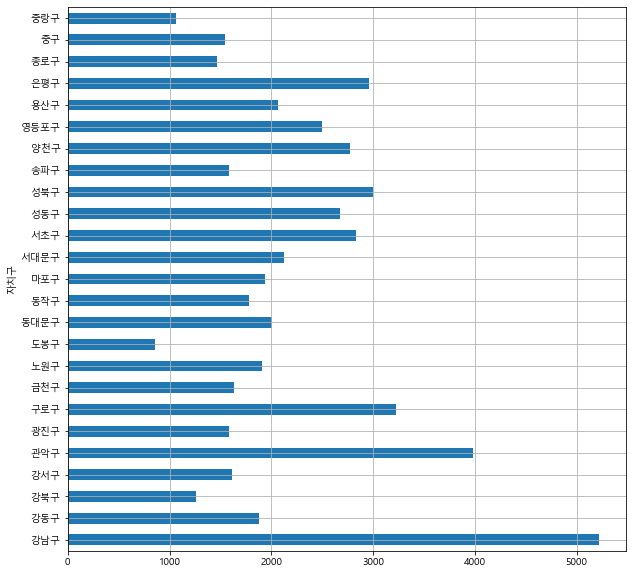

In [216]:
plt.figure()
data_result['소계'].plot(kind = 'barh', grid=True, figsize=(10,10))
plt.show()

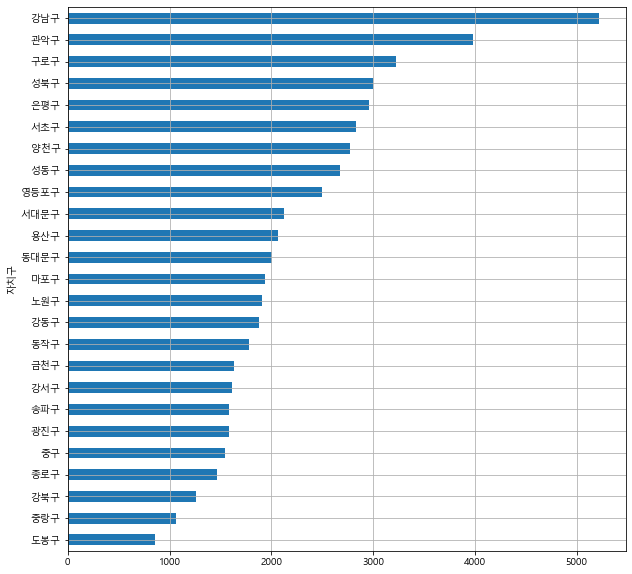

In [217]:
#정렬된 그래프 (sort_values())
data_result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

정렬된 그래프에서 강남구의 cctv 개수가 월등히 많다.

인구대비 CCTV 비율을 계산해서 정렬하여 그래프로 시각화한다.

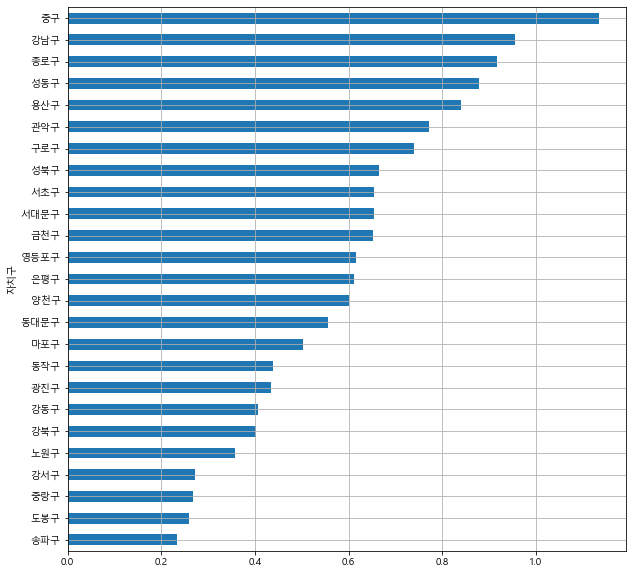

In [218]:
data_result['CCTV 비율'] = data_result['소계'] / data_result['인구'] * 100
data_result['CCTV 비율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

인구 대비 CCTV 수는 중구가 월등히 높다. 송파구는 인구대비 CCTV 비율이 가장 낮다.

CCTV와 인구와의 상관관계를 scatter 함수로 s=50의 마크로 시각화 한다.

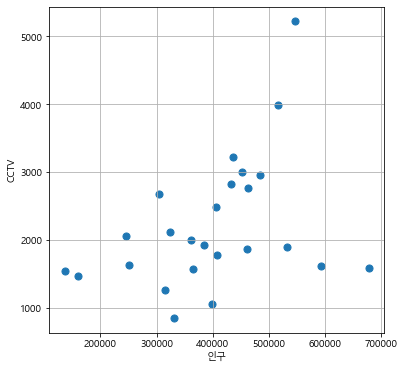

In [219]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구'], data_result['소계'], s=50)
plt.xlabel('인구')
plt.ylabel('CCTV')
plt.grid()
plt.show()

인구수와 cctv 개수는 양의 상관관계가 있다는 것을 알 수 있다.

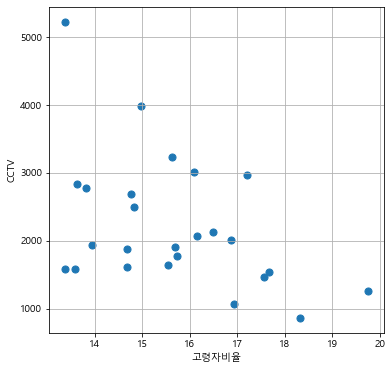

In [221]:
# 고령자비율과 cctv 갯수는 음의 상관관계가 있다는 것을 알 수 있다.
plt.figure(figsize=(6,6))
plt.scatter(data_result['고령자비율'], data_result['소계'], s=50)
plt.xlabel('고령자비율')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [225]:
fp1 = np.polyfit(pop, cctv_total, 1)
fp1

array([2.88508881e-03, 1.06734028e+03])

In [227]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

numpy의 polyfit 명령으로 직선을 그릴 수 있다. 이를 그리기 위해 x축과 y축 데이터를 얻어야 한다. x축 데이터는 numpy의 linspace로 만들고, y축은 poly1d로 만들 수 있다.

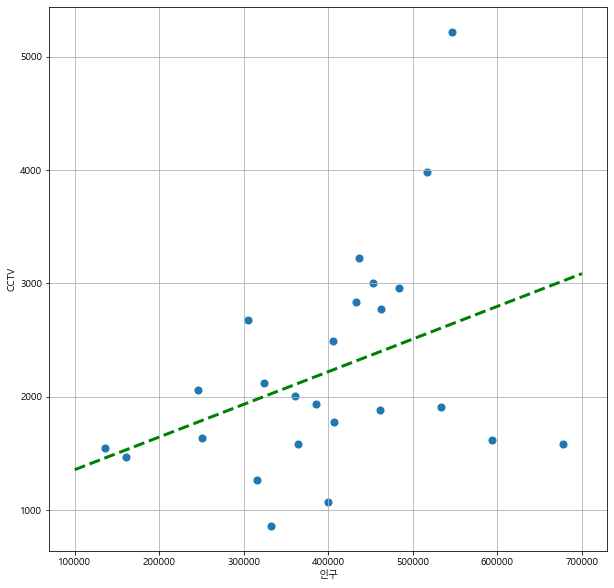

In [229]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구')
plt.ylabel('CCTV')
plt.grid()
plt.show()

하나의 직선이 이 전체 데이터를 대표하는 역할을 한다면, 인구수가 300000 일 때는 CCTV는 약 2000개 정도여야 한다는 것을 알 수 있다.

그 경향에서 멀어지는 자치구 이름을 나타나도록 하고 멀어질수록 다른 색이 나타 나도록 해 보자.

오차를 계산할 수 있는 코드를 만들고 오차가 큰 순으로 데이터를 정렬하여 저장한다.

In [231]:
pop_num = np.array(data_result['인구'], dtype = int)
cctv_total = np.array(data_result['소계'], dtype = int)
fp1=np.polyfit(pop_num, cctv_total, 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구']))
                           
df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구,한국인,외국인,고령자,외국인비율,고령자비율,CCTV 비율,오차
자치구,,,,,,,,,,
강남구,5221.0,327.838828,546158,541233,4925,73097,0.901754,13.3839,0.95595,2577.95
송파구,1586.0,368.674699,678067,671512,6555,90700,0.966719,13.3763,0.2339,1437.62
관악구,3985.0,325.779967,516318,499740,16578,77341,3.21081,14.9793,0.771811,1428.04
도봉구,858.0,581.355932,331744,329560,2184,60784,0.658339,18.3226,0.258633,1166.45
강서구,1617.0,378.609626,593203,586936,6267,87032,1.05647,14.6715,0.272588,1161.78


In [233]:
data_result

,소계,최근증가율,인구,한국인,외국인,고령자,외국인비율,고령자비율,CCTV 비율,오차
자치구,,,,,,,,,,
강남구,5221.0,327.838828,546158,541233,4925,73097,0.901754,13.3839,0.95595,2577.95
강동구,1879.0,591.666667,461547,457164,4383,67742,0.949632,14.6772,0.407109,519.944
강북구,1265.0,395.862069,315395,311773,3622,62338,1.1484,19.7651,0.401084,712.283
강서구,1617.0,378.609626,593203,586936,6267,87032,1.05647,14.6715,0.272588,1161.78
관악구,3985.0,325.779967,516318,499740,16578,77341,3.21081,14.9793,0.771811,1428.04
광진구,1581.0,1304.687500,363925,349574,14351,49457,3.94339,13.5899,0.43443,536.296
구로구,3227.0,504.477612,436707,405075,31632,68280,7.2433,15.6352,0.738939,899.721
금천구,1634.0,226.439791,250554,232250,18304,38950,7.30541,15.5456,0.652155,156.211
노원구,1906.0,122.342733,533041,528887,4154,83636,0.779302,15.6904,0.357571,699.211


결과를 CSV파일로 저장한다.

In [236]:
data = pd.DataFrame(df_sort)
data.to_csv('data/CCTV_result.csv', encoding='utf-8')

In [237]:
CCTV_result = pd.read_csv('data/CCTV_result.csv', encoding='utf-8')
CCTV_result.head(30)

,자치구,소계,최근증가율,인구,한국인,외국인,고령자,외국인비율,고령자비율,CCTV 비율,오차
0,강남구,5221.0,327.838828,546158,541233,4925,73097,0.901754,13.383856,0.955950,2577.945379
1,송파구,1586.0,368.674699,678067,671512,6555,90700,0.966719,13.376259,0.233900,1437.623801
2,관악구,3985.0,325.779967,516318,499740,16578,77341,3.210812,14.979334,0.771811,1428.036429
3,도봉구,858.0,581.355932,331744,329560,2184,60784,0.658339,18.322562,0.258633,1166.451188
4,강서구,1617.0,378.609626,593203,586936,6267,87032,1.056468,14.671537,0.272588,1161.783624
5,중랑구,1068.0,192.156863,399415,394414,5001,67637,1.252081,16.934016,0.267391,1151.688033
6,구로구,3227.0,504.477612,436707,405075,31632,68280,7.243300,15.635197,0.738939,899.721235
7,성동구,2679.0,553.488372,304851,297397,7454,45005,2.445129,14.762950,0.878790,732.137505
8,강북구,1265.0,395.862069,315395,311773,3622,62338,1.148401,19.765057,0.401084,712.282871
9,노원구,1906.0,122.342733,533041,528887,4154,83636,0.779302,15.690350,0.357571,699.210911


그래프에 텍스트와 color map을 입힌다.

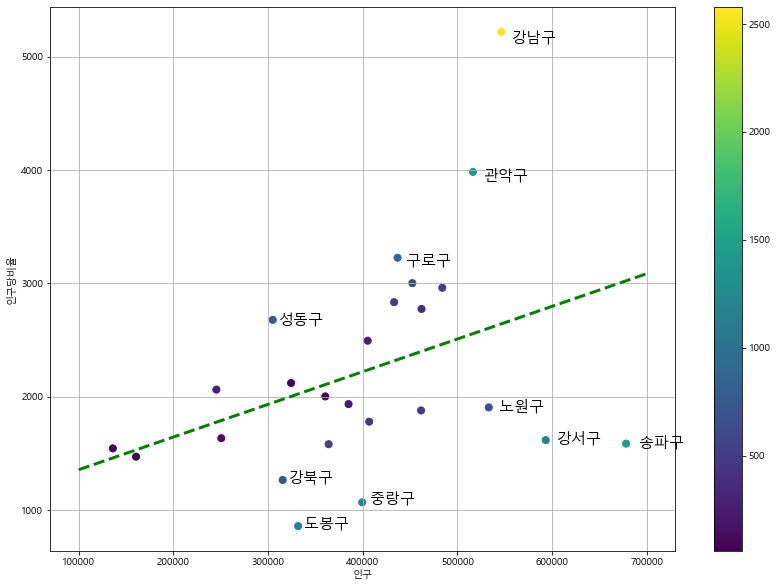

In [238]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구'], data_result['소계'],
           c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

# 자치구 이름 표시 개수
for n in range(10):
    plt.text(df_sort['인구'][n]*1.02, df_sort['소계'][n]*0.98,
            df_sort.index[n], fontsize=15)
    
plt.xlabel('인구')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

지선을 기준으로 강남구, 관악구, 구로구, 성동구는 서울시 전체 지역의 일반적인 경향보다 CCTV가 많이 설치된 지역이다. 그리고 송파구, 강서구, 노원구, 중랑구, 도봉구, 강북구는 일반적인 경향보다 CCTV가 적게 설치된 지역이다. 특히 강남구는 월등히 많은 CCTV가 설치되었지만 송파구는 인구수에 비해 너무 적은 수의 CCTV가 설치되어 있다.